In [4]:
#loading dataaset
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

# Load the dataset
iris = load_iris()


In [13]:
print("Target names:", iris.target_names)
print("Feature names:", iris.feature_names)
print("Shape of data:", iris.data.shape)
print("First 5 rows of data:\n", iris.data[:5])

Target names: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape of data: (150, 4)
First 5 rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [17]:
# Convert data to DataFrame for easier exploration

df = pd.DataFrame(iris.data, columns=iris.feature_names)



In [19]:
df['target']=iris.target
df['species']= df['target'].map({i: name for i,name in enumerate(iris.target_names)})

#basic info
print(df.shape)
print(df.head())
print(df['species'].value_counts())

(150, 7)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name species  
0       0      setosa  setosa  
1       0      setosa  setosa  
2       0      setosa  setosa  
3       0      setosa  setosa  
4       0      setosa  setosa  
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [ ]:
#so the dataset is balanced 

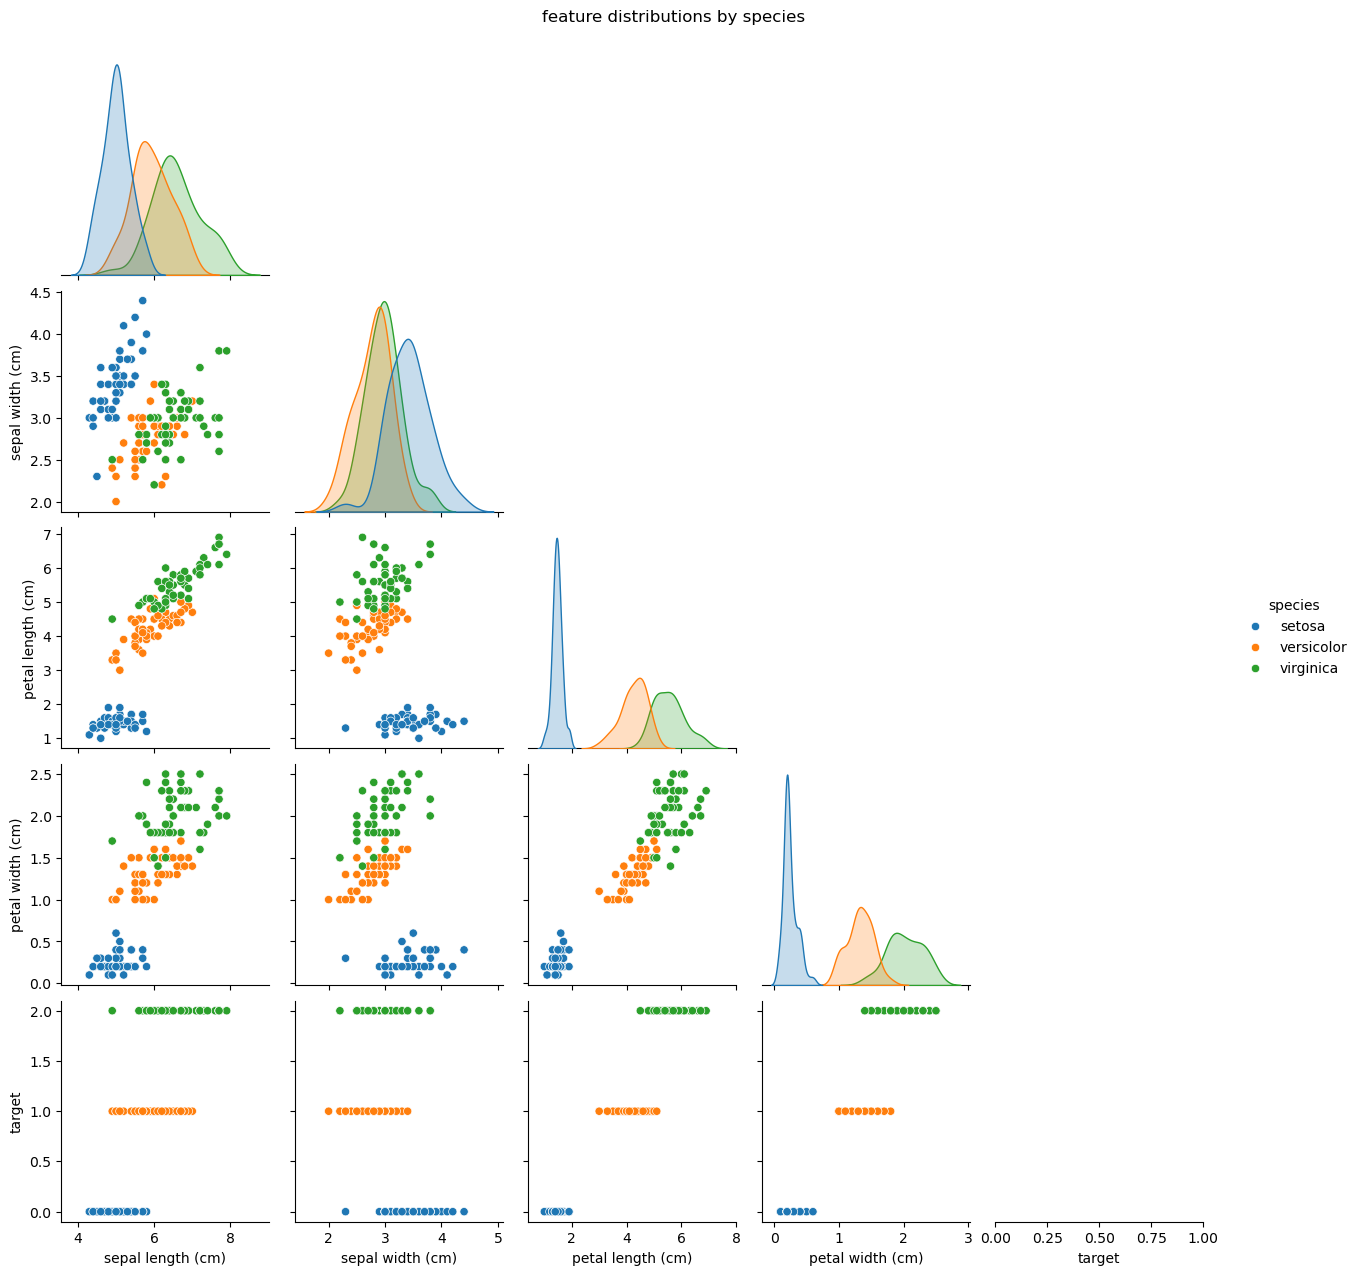

In [28]:
# pairplot to see relationships 
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df,hue='species',corner='true')
plt.suptitle("feature distributions by species",y=1.02)
plt.show()

In [ ]:
#Petal width is usually a strong separator — especially for setosa
#Overlaps between versicolor and virginica are normal and expected

In [30]:
# Train-Test Split
from sklearn.model_selection import train_test_split

# Features and target
X = df[iris.feature_names]   # all 4 feature columns
y = df['target']        # target labels (0,1,2)

# splitting the dataset into (80:20) for train and test
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

print(x_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [41]:
#4. Feature Scaling
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# fit and transform on training dataset , transform on test dataset
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [42]:
import numpy as np
print("Before Scaling:", np.round(x_train[:1], 2))
print("After Scaling:", np.round(x_train_scaled[:1], 2))


Before Scaling:    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
8                4.4               2.9                1.4               0.2
After Scaling: [[-1.72 -0.33 -1.35 -1.32]]


In [43]:
# training the classifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model with k=3 (arbitrary start)
knn = KNeighborsClassifier(n_neighbors=3)

# Train (fit) the model on scaled training data
knn.fit(x_train_scaled, y_train)



KNeighborsClassifier(n_neighbors=3)

In [51]:
# Make a prediction on one test sample
print("Actual:", y_test.iloc[0])  
pred = knn.predict([X_test_scaled[0]])
print("Predicted:", pred)

print("setosa" if pred == 0 else "versicolor" if pred == 1 else "virginica")


Actual: 0
Predicted: [0]
setosa


Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



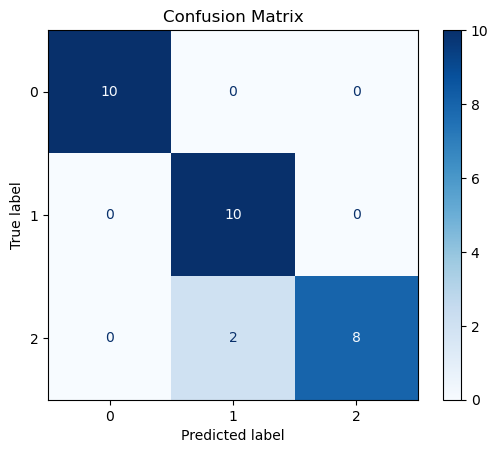

In [64]:
#Evaluating the Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test data
y_pred = knn.predict(x_test_scaled)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


# Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# confusion matrix visualisation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)

disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


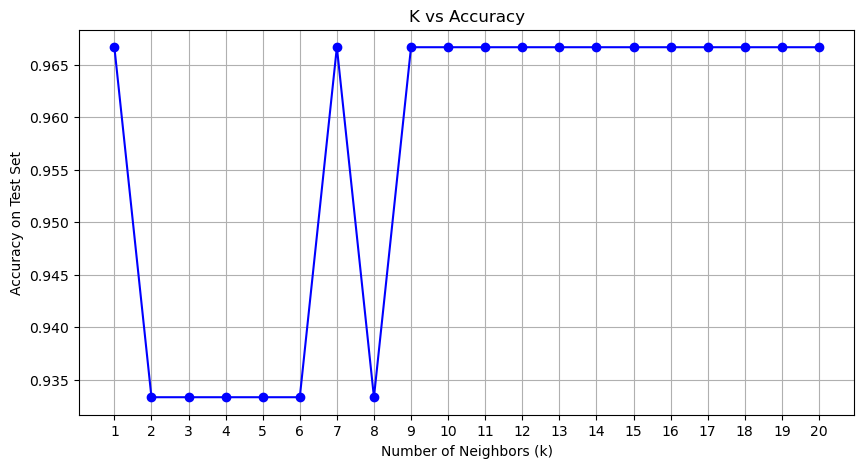

In [65]:
# hyperparamter tuning for increasing performance 


# Try different k values from 1 to 20
k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plotting k vs accuracy
plt.figure(figsize=(10,5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.xticks(k_values)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy on Test Set')
plt.title('K vs Accuracy')
plt.grid(True)
plt.show()


In [66]:
#The model achieves highest and most stable accuracy from k = 9 to 20,  but balanced value is k=9
# Final  value
best_k = 9  

# Retrain with best k on the full training data
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train_scaled, y_train)



KNeighborsClassifier(n_neighbors=9)

In [67]:
#saving the model
import joblib

# Save the model
joblib.dump(final_model, 'knn_classification_model.pkl')

# Save the scaler (since test data needs to be scaled the same way)
joblib.dump(scaler, 'scaler_classification.pkl')


['scaler.pkl']